In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CSV 파일을 읽어옵니다.
df_credit = pd.read_csv('new_data/전산업생산지수(2000.1~).csv',encoding='cp949')

In [3]:
# 데이터 전처리 (가로 -> 세로 변환)
# 첫 번째 열이 산업 분류, 나머지 열이 날짜 데이터입니다.
dates = df_credit.columns[1:]
values = df_credit.iloc[0, 1:].values

In [4]:
# 데이터프레임 생성
df = pd.DataFrame({'Production_Index': values}, index=dates)
df.index.name = '날짜'

In [5]:
# 날짜 형식 변환 및 정렬 (예: '2025.12' -> '2025-12-01')
df.index = df.index.str.replace(r'[^\d.]', '', regex=True)
df.index = pd.to_datetime(df.index, format='%Y.%m')
df = df.sort_index()

In [ ]:
# 날짜 범위 설정 (2004년 1월 1일부터 2026년 2월 1일까지)
start_date = '2004-01-01'
end_date = '2026-02-01'
df = df[(df.index >= start_date) & (df.index <= end_date)]

In [7]:
# 숫자 변환
df['Production_Index'] = pd.to_numeric(df['Production_Index'])

In [8]:
# 12개월 누적 로그 변화율 계산 (성장률)
df['log_val'] = np.log(df['Production_Index'])
df['12m_log_return'] = df['log_val'].diff(12)

In [9]:
# Z-Score 계산 (부호 반전 없음: 생산 증가 = 호재)
mean_val = df['12m_log_return'].mean()
std_val = df['12m_log_return'].std()

df['z_score'] = (df['12m_log_return'] - mean_val) / std_val

In [10]:
# CSV 파일 저장
output_filename = 'new_data/new_data_z_score/Production_Index_Z_Score.csv'
df.to_csv(output_filename, encoding='utf-8-sig')
print(f"'{output_filename}' 파일이 저장되었습니다.")

'new_data/new_data_z_score/Production_Index_Z_Score.csv' 파일이 저장되었습니다.


In [11]:
# 결과 확인
print(df[['Production_Index', '12m_log_return', 'z_score']].tail())

            Production_Index  12m_log_return   z_score
날짜                                                    
2025-08-01             114.3        0.007024 -0.646888
2025-09-01             115.8        0.022708 -0.127585
2025-10-01             112.8       -0.008826 -1.171663
2025-11-01             113.8        0.012379 -0.469595
2025-12-01             115.5        0.009569 -0.562602


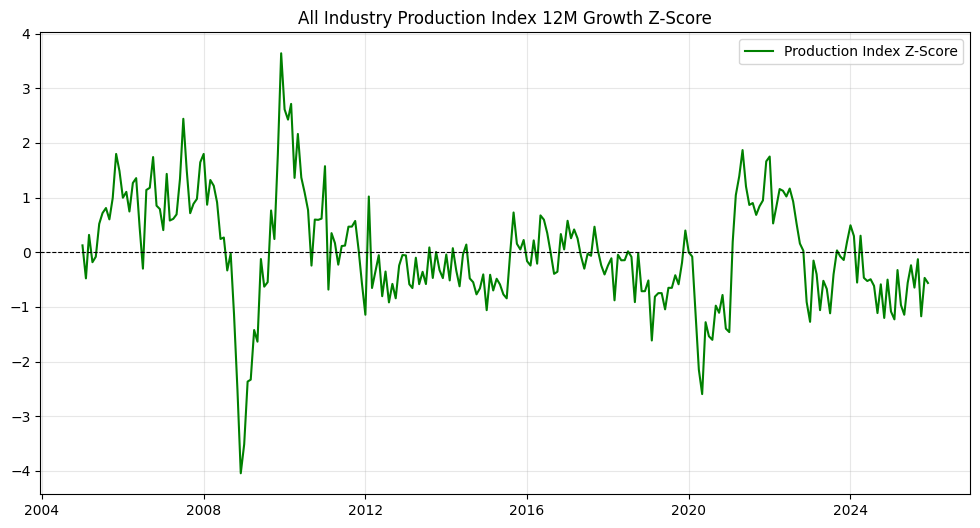

In [12]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['z_score'], label='Production Index Z-Score', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('All Industry Production Index 12M Growth Z-Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()